# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
#     # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
       

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City '" + city.title() +" 'not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City 'Illoqqortoormiut 'not found. Skipping...
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | kalabo
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | morant bay
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | isangel
Processing Record 10 of Set 1 | komsomolskiy
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | constitucion
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | karaul
City 'Karaul 'not found. Skipping...
Processing Record 17 of Set 1 | severo-kurilsk
Processing Record 18 of Set 1 | grand river south east
City 'Grand River South East 'not found. Skipping...
Processing Record 19 of Set 1 | bred

Processing Record 33 of Set 4 | ancud
Processing Record 34 of Set 4 | mecca
Processing Record 35 of Set 4 | vaitupu
City 'Vaitupu 'not found. Skipping...
Processing Record 36 of Set 4 | marquette
Processing Record 37 of Set 4 | maridi
Processing Record 38 of Set 4 | otjimbingwe
Processing Record 39 of Set 4 | grudziadz
Processing Record 40 of Set 4 | upington
Processing Record 41 of Set 4 | westbrook
Processing Record 42 of Set 4 | eureka
Processing Record 43 of Set 4 | milkovo
Processing Record 44 of Set 4 | krasnyy bogatyr
Processing Record 45 of Set 4 | boda
Processing Record 46 of Set 4 | pitimbu
Processing Record 47 of Set 4 | felidhoo
City 'Felidhoo 'not found. Skipping...
Processing Record 48 of Set 4 | attawapiskat
City 'Attawapiskat 'not found. Skipping...
Processing Record 49 of Set 4 | lompoc
Processing Record 0 of Set 5 | zhigansk
Processing Record 1 of Set 5 | grandview
Processing Record 2 of Set 5 | emerald
Processing Record 3 of Set 5 | matveyevka
Processing Record 4 of 

Processing Record 18 of Set 8 | lazaro cardenas
Processing Record 19 of Set 8 | paucartambo
City 'Paucartambo 'not found. Skipping...
Processing Record 20 of Set 8 | riachao
Processing Record 21 of Set 8 | klaksvik
Processing Record 22 of Set 8 | mosquera
Processing Record 23 of Set 8 | svetlogorsk
Processing Record 24 of Set 8 | arman
Processing Record 25 of Set 8 | tomaszow lubelski
Processing Record 26 of Set 8 | tambul
City 'Tambul 'not found. Skipping...
Processing Record 27 of Set 8 | cartagena
Processing Record 28 of Set 8 | mirandola
Processing Record 29 of Set 8 | adrar
Processing Record 30 of Set 8 | chistoye
Processing Record 31 of Set 8 | port hardy
Processing Record 32 of Set 8 | marawi
Processing Record 33 of Set 8 | santa isabel do rio negro
Processing Record 34 of Set 8 | ketchikan
Processing Record 35 of Set 8 | syracuse
Processing Record 36 of Set 8 | imbituba
Processing Record 37 of Set 8 | khabary
Processing Record 38 of Set 8 | otradnoye
Processing Record 39 of Set

Processing Record 47 of Set 11 | menongue
Processing Record 48 of Set 11 | annamalainagar
Processing Record 49 of Set 11 | pangody
Processing Record 0 of Set 12 | sola
Processing Record 1 of Set 12 | saundatti yellamma
City 'Saundatti Yellamma 'not found. Skipping...
Processing Record 2 of Set 12 | bagrami
Processing Record 3 of Set 12 | necochea
Processing Record 4 of Set 12 | barra patuca
Processing Record 5 of Set 12 | gallup
Processing Record 6 of Set 12 | synya
Processing Record 7 of Set 12 | yanan
City 'Yanan 'not found. Skipping...
Processing Record 8 of Set 12 | moerai
Processing Record 9 of Set 12 | paranhos
Processing Record 10 of Set 12 | roald
Processing Record 11 of Set 12 | nizhnyaya omka
Processing Record 12 of Set 12 | shubarkuduk
Processing Record 13 of Set 12 | kaeo
Processing Record 14 of Set 12 | high prairie
Processing Record 15 of Set 12 | chumikan
Processing Record 16 of Set 12 | sioux lookout
Processing Record 17 of Set 12 | moussoro
Processing Record 18 of Set 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
354,Imbituba,-28.2400,-48.6703,21.42,80,100,3.32,BR,1680729499
125,San Joaquin,37.9333,-121.3011,17.70,44,0,3.60,US,1680729439
476,Swakopmund,-22.6833,14.5333,18.52,78,63,3.23,NA,1680729532
344,Tomaszow Lubelski,50.4477,23.4162,-0.54,67,100,3.54,PL,1680729495
466,Yantai,37.5333,121.4000,6.95,65,66,4.68,CN,1680729529
374,Mayumba,-3.4320,10.6554,26.52,84,98,3.08,GA,1680729506
110,Ponta Do Sol,32.6667,-17.1000,18.34,47,4,3.40,PT,1680729436
491,Dillon,34.4166,-79.3712,31.81,43,11,4.56,US,1680729536
436,Ewa Beach,21.3156,-158.0072,27.97,61,40,8.75,US,1680729523
513,Kaeo,-35.1000,173.7833,15.74,94,100,3.61,NZ,1680729543


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
29,Safaga,26.7292,33.9365,22.92,33,0,7.55,EG,1680729416
308,Bambous Virieux,-20.3428,57.7575,24.56,94,40,1.54,MU,1680729485
55,Warrington,53.3925,-2.5802,10.53,95,75,2.57,GB,1680729421
445,Alofi,-19.0595,-169.9187,28.94,74,75,3.09,NU,1680729525
370,Gravdal,68.1214,13.5031,3.94,75,0,2.57,NO,1680729505
66,Hasaki,35.7333,140.8333,15.22,68,100,10.29,JP,1680729423
250,Mirnyy,62.5353,113.9611,-15.51,95,100,4.11,RU,1680729471
537,Maiduguri,11.8464,13.1603,30.71,8,100,4.47,NG,1680729549
382,Hirara,24.8000,125.2833,23.15,78,100,5.14,JP,1680729507


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

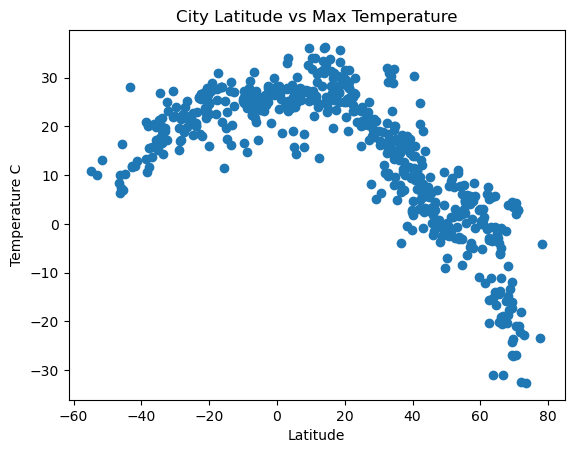

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature C")
plt.title("City Latitude vs Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

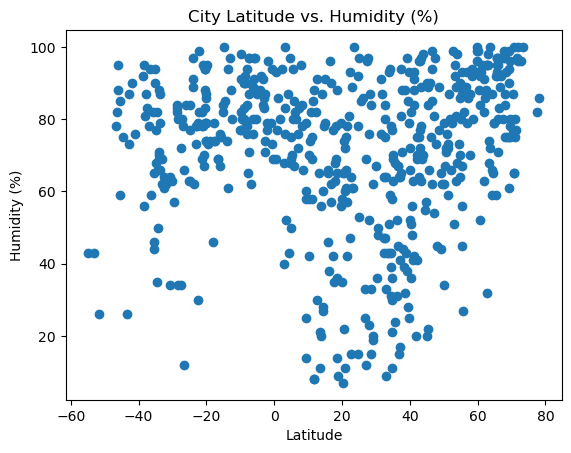

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

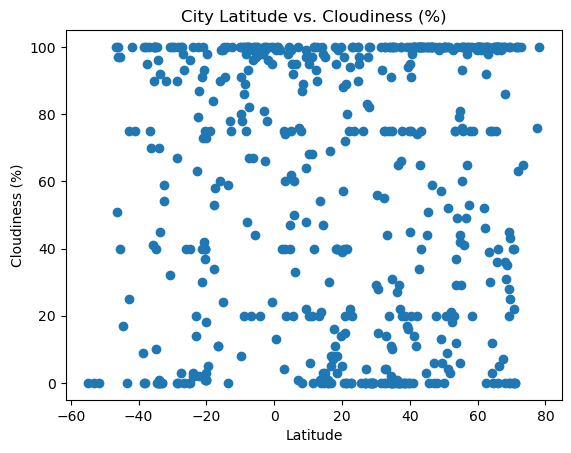

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

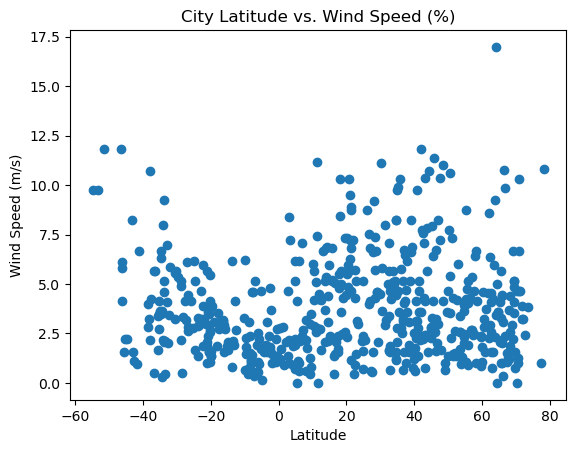

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (%)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [66]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, location):
    # Regression caluculation
    (slope, intercept, rvalue, pvalue, srderr) = linregress(x_values, y_values)
    
    # Linean Regression line calucation
    regress_values = (slope * x_values) + intercept
    line_eq = f"y = {round(slope ,2)}x +{round(intercept ,2)}"
    print(f" The rvalue is: {round((rvalue **2),2)}")
    
    
    # create plots

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color="red")
   
    # Show equation on scatter plot
  
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{hemisphere} Hemisphere - {x_label} verse {y_label} Linear Regression")
    plt.annotate(line_eq, location, color="red")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.sample(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
553,Lesogorskiy,61.0455,28.9294,1.46,93,99,2.93,RU,1680729552
385,Fernley,39.6080,-119.2518,9.48,28,16,0.76,US,1680729508
464,Falesti,47.5736,27.7092,0.26,97,100,10.35,MD,1680729529
190,Charyshskoye,51.3978,83.5598,1.33,72,4,1.44,RU,1680729456
171,Marquette,46.5333,-87.6335,4.27,94,100,6.71,US,1680729450
284,Quang Ngai,15.1167,108.8000,23.51,91,3,2.37,VN,1680729480
368,College,64.8569,-147.8028,-2.03,79,100,3.60,US,1680729504
137,Teguldet,57.3064,88.1667,-3.86,86,100,2.42,RU,1680729442
511,Nizhnyaya Omka,55.4338,74.9426,2.25,67,76,3.98,RU,1680729543


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =  city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
277,Inhambane,-23.8650,35.3833,20.62,89,3,3.30,MZ,1680729477
119,Karratha,-20.7377,116.8463,27.79,67,93,3.60,AU,1680729438
487,Tapes,-30.6733,-51.3958,21.85,64,100,5.56,BR,1680729535
90,Rio Grande,-32.0350,-52.0986,23.06,62,90,5.87,BR,1680729431
91,Port Lincoln,-34.7333,135.8667,16.85,77,10,3.50,AU,1680729432
358,Bowen,-20.0167,148.2333,24.78,87,18,1.62,AU,1680729500
339,Riachao,-7.3619,-46.6172,23.62,87,100,0.56,BR,1680729494
10,Hermanus,-34.4187,19.2345,17.67,66,0,3.63,ZA,1680729412
18,Maputo,-25.9653,32.5892,21.24,84,40,4.12,MZ,1680729414


###  Temperature vs. Latitude Linear Regression Plot

 The rvalue is: 0.77


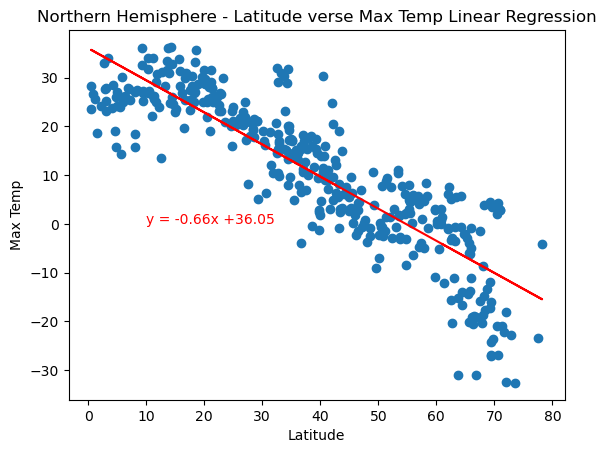

In [67]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Northern", (10,0))

plt.show()

 The rvalue is: 0.49


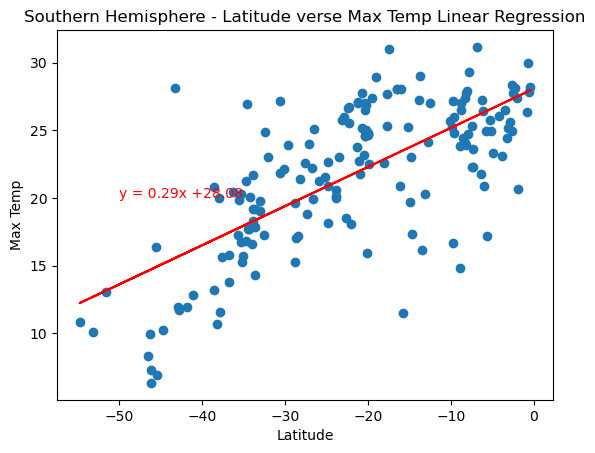

In [70]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Southern", (-50, 20))

Discussion about the linear relationship: For the northern hemisphere with is a good corralation as the r-values is 0.77 with southern hemisphere has an r-value of 0.49 doesn't show as much of corralation.  With the northern hemisphere plot the data points are much closer to the linear regression line.

### Humidity vs. Latitude Linear Regression Plot

 The rvalue is: 0.11


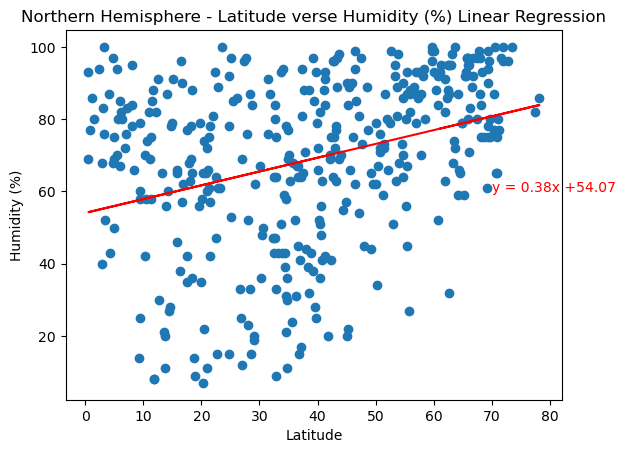

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern", (70, 60))
plt.show()

 The rvalue is: 0.13


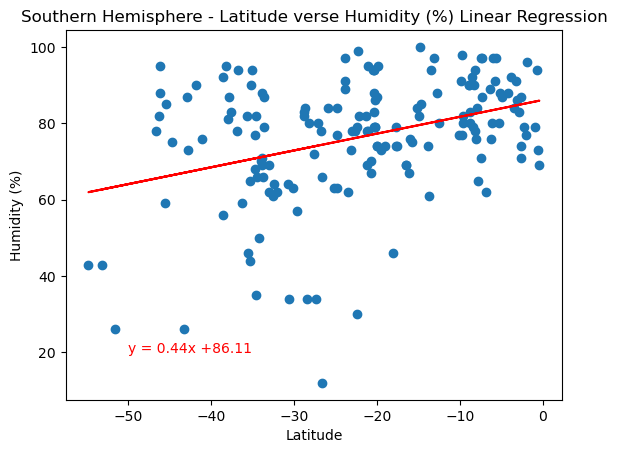

In [71]:
# Southern Hemisphere
x_vaules = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern", (-50, 20))
plt.show()

Discussion about the linear relationship: For the northern and southern Humidity there is not a good corration with the data both r-values are 0.11 and 0.13 respectively.  When viewing the plots you can see a wide spread of data points compared to the linear regression line.

### Cloudiness vs. Latitude Linear Regression Plot

 The rvalue is: 0.02


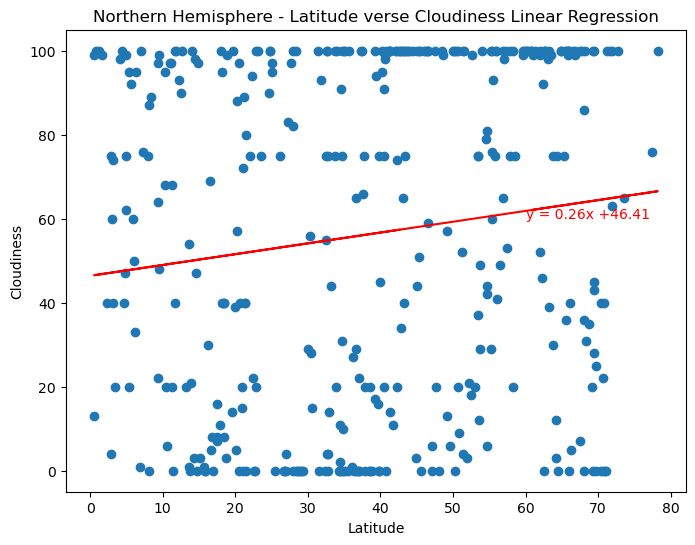

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Northern", (60, 60))
plt.show()

 The rvalue is: 0.09


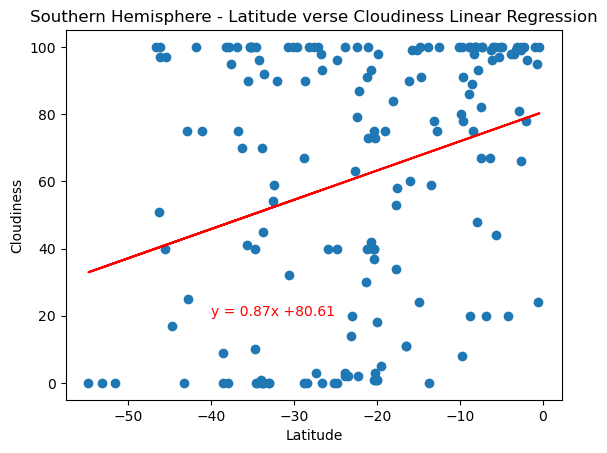

In [78]:
# Southern Hemisphere
x_vaules = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Southern", (-40, 20))
plt.show()

Discussion about the linear relationship: For both the northern and southern hemisphers verse the cloudiness doesn't have a strong correlation with the regression line as the r-values are 0.02 and 0.09 respectively. 

### Wind Speed vs. Latitude Linear Regression Plot

 The rvalue is: 0.0


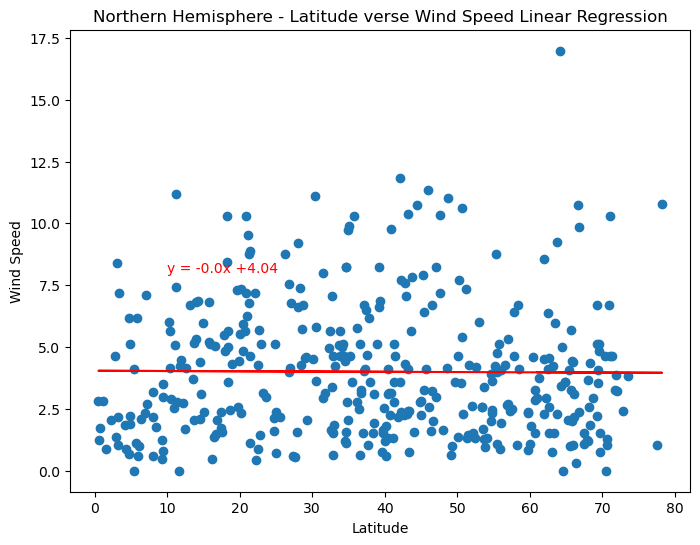

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (m/s)", "Northern", (10, 8))
plt.show()

 The rvalue is: 0.26


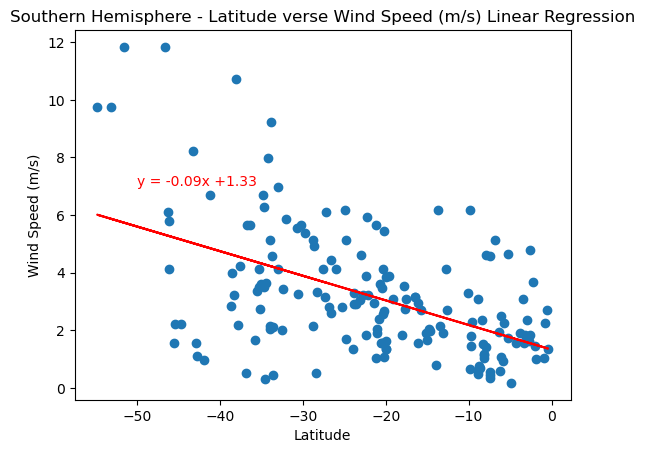

In [79]:
# Southern Hemisphere
x_vaules = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (m/s)", "Southern", (-50, 7))
plt.show()

Discussion about the linear relationship: The northern and southern hemispheres verse wind speed doesn't have a good correlation with the regression line with the r-value being 0.11 and 0.26 respectively.